In [1]:
import pandas as pd
import os

In [2]:
dataset_name = "bank_branch_transactions_ratio_max"

In [3]:
input_fname = "bank_branch_weekly_transactions.csv"
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

In [4]:
data = pd.read_csv(input_fname, parse_dates=['week_start_date'])
data.head()

,branch_id,week_start_date,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,num_holidays,is_region_1,is_region_2
0,15338984_74844,2013-04-01,115.2545,62.4200,188.3425,105.0875,265.4070,279.3280,0,1,0
1,15338984_74844,2013-04-08,95.1960,89.1920,244.8840,109.3405,411.7580,258.4280,0,1,0
2,15338984_74844,2013-04-15,82.0025,69.4725,215.8385,97.4500,377.3325,227.8525,0,1,0
3,15338984_74844,2013-04-22,84.1970,67.3795,204.7285,91.0915,300.8050,201.9890,0,1,0
4,15338984_74844,2013-04-29,85.4700,86.2445,202.8780,124.2735,339.6775,197.0490,0,1,0


In [5]:
data.columns

Index(['branch_id', 'week_start_date', 'Act_5_0__40944', 'Act_5_0__45308',
       'Act_5_0__82324', 'Act_5_0__89097', 'Act_5_0__94157', 'Act_5_0__96723',
       'num_holidays', 'is_region_1', 'is_region_2'],
      dtype='object')

In [6]:
series_col = "branch_id"
epoch_col = 'week_start_date'
time_col = 'week_start_date'
value_col = 'Act_5_0__40944'
exog_cols = [
    'Act_5_0__45308', 'Act_5_0__82324', 'Act_5_0__89097', 'Act_5_0__94157', 'Act_5_0__96723',
    'num_holidays',
    'is_region_1', 'is_region_2',
]

In [7]:
len(exog_cols)

8

## Visualize Data

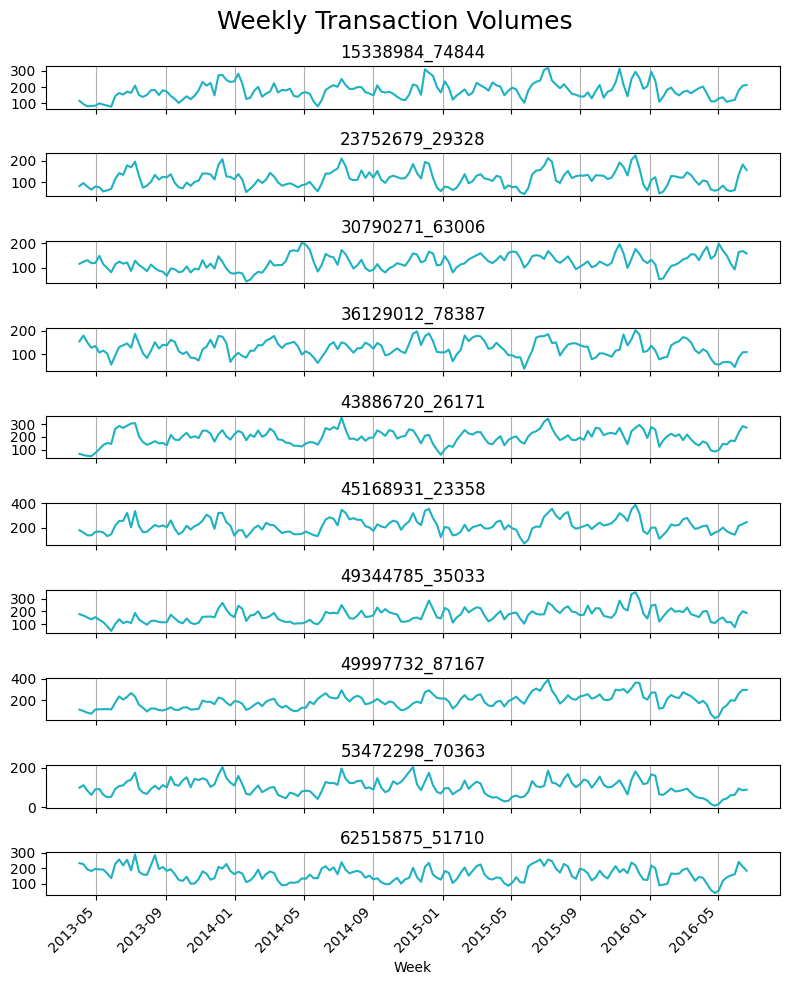

In [8]:
import matplotlib.pyplot as plt

def plot_trends(df, series_col, val_col, epoch_col, epoch_label, num_series=10,
                filepath=outp_fig_fname, chart_title=dataset_name):
    """
    This function takes a dataframe and a number of series to chart.
    It creates a n x 1 subplot (with n being the number of series, at most 10) and plots those series.
    
    Parameters:
    df (DataFrame): dataframe.
    num_series (int): The number of series to plot, defaulted to 10.
    """
    
    # Get the unique series from the dataframe
    unique_series = df[series_col].unique()
    
    # Limit the number of series to plot
    series_to_plot = unique_series[:min(len(unique_series), num_series)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_series, len(series_to_plot)), ncols=1, figsize=(8, num_series*1))
    
    # If there's only one series to plot, axes will not be an array, so we wrap it in a list
    if num_series == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each series on a separate subplot
    for i, (ax, series_id) in enumerate(zip(axes, series_to_plot)):
        # Filter the dataframe for the current series
        series_data = df[df[series_col] == series_id]
                
        # Plot the data
        ax.plot(series_data[epoch_col], series_data[val_col], color=plot_color)
        
        # Set the title and labels
        ax.set_title(series_id)
        # ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(series_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel(epoch_label)            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(chart_title, fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Plot a few series
plot_trends(
    data,
    series_col=series_col,
    val_col=value_col,
    epoch_col=time_col,
    epoch_label='Week',
    num_series=10,
    filepath=outp_fig_fname,
    chart_title="Weekly Transaction Volumes"
)  


# Save Main Data File

In [9]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False, float_format="%.3f")